## Часть 1.

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

    1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
    Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

__Ответ:__

Прокурор оценил вероятность того, что у подсудимого редкая группа крови, которая была найдена на месте убиства.

А должен был оценить условную вероятность того, что подозреваемый - убийца, при условии, что у подозреваемого редкая группа крови.
   

    2.Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

__Ответ:__


   

Адвокат оценил вероятность виновности случайно выбранного человека из города с населением 1 млн с редкой группой крови. Т.е. при данной априорной вероятности эта веротяность действительно равна 0.01%. Но исключать группу крови из материалов дела нельзя, т.к. вместе с другими даже незначительными доказательствами группа крови может стать решающим фактором того, что вероятность вины подсудимого болет большой.

    3. Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

    Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

    Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [239]:
def p_covid_test(fpr=0.05, fnr=0.05, p_covid=0.01, test_positive=True):
    if test_positive:
        return p_covid * (1 - fnr) / (fpr * (1 - p_covid) + (1 - fnr) * p_covid)
    else:
        return p_covid * fnr / ((1 - fpr) * (1 - p_covid) + fnr * p_covid)
    
p_covid_test()

0.16101694915254236

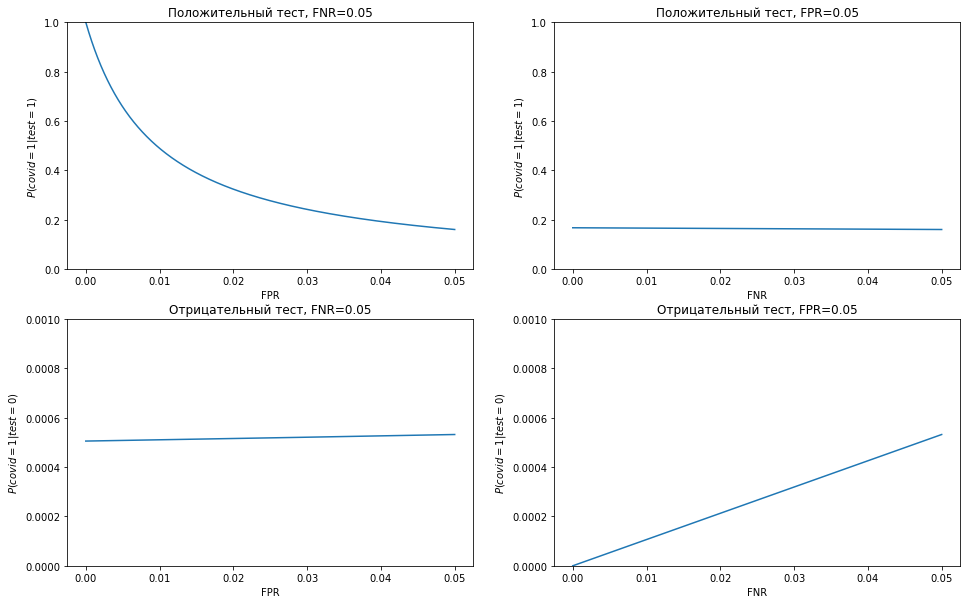

In [242]:
fpr = np.linspace(0, 0.05, 1000)
fnr = np.linspace(0, 0.05, 1000)

y_lim_positive_test = (0, 1)
y_lim_negative_test = (0, 0.001)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

ax1.plot(fpr, p_covid_test(fpr=fpr, test_positive=True))
ax1.set_ylim(y_lim_positive_test)        
ax1.set_title('Положительный тест, FNR=0.05')
ax1.set_xlabel('FPR')
ax1.set_ylabel('$P(covid=1|test=1)$')


ax2.plot(fnr, p_covid_test(fnr=fnr, test_positive=True))
ax2.set_ylim(y_lim_positive_test)                                             
ax2.set_title('Положительный тест, FPR=0.05')
ax2.set_xlabel('FNR')
ax2.set_ylabel('$P(covid=1|test=1)$')

ax3.plot(fpr, p_covid_test(fpr=fpr, test_positive=False))
ax3.set_ylim(y_lim_negative_test)
ax3.set_title('Отрицательный тест, FNR=0.05')
ax3.set_xlabel('FPR')
ax3.set_ylabel('$P(covid=1|test=0)$')


ax4.plot(fnr, p_covid_test(fnr=fnr, test_positive=False))
ax4.set_ylim(y_lim_negative_test)
ax4.set_title('Отрицательный тест, FPR=0.05')
ax4.set_xlabel('FNR')
ax4.set_ylabel('$P(covid=1|test=0)$');

Судя по графикам, я бы рекомендовал сосредоточиться на уменьшении FPR - ложно-положительны срабатываний. Это бы позволило уменьшить нагрузку на медицинускую систему.

## Часть 2.

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:

    1.Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [249]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [250]:
all_d = pd.read_csv('owid-covid-data.csv')

In [251]:
df = all_d[(all_d['location'] == 'Russia') & (all_d['date'] >= '2020-03-03')]
df['new_cases'] = np.where(df['new_cases'] == 0, 1, df['new_cases'])

In [252]:
df = df.reset_index(drop = True).reset_index().rename(columns={'index':'day_num'})

In [253]:
df.head()

,day_num,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
1,1,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2,2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
3,3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
4,4,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [254]:
test.shape

(311, 64)

    2.Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

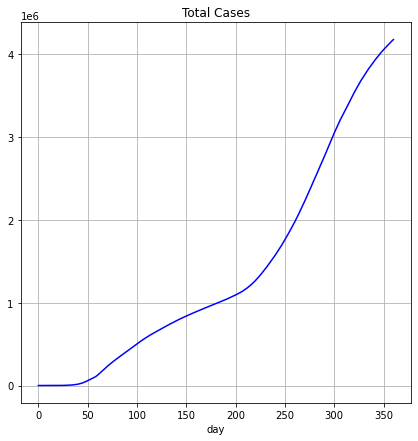

In [255]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(df.index, df['total_cases'].values, color = 'blue')

ax.set(xlabel='day', title='Total Cases')
ax.grid()
plt.show()

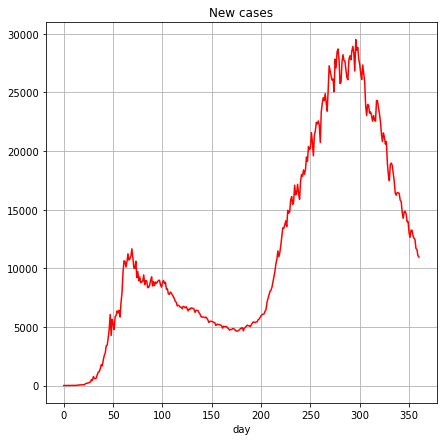

In [256]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(df.index, df['new_cases'].values, color = 'red')

ax.set(xlabel='day', title='New cases')
ax.grid()
plt.show()

    a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [257]:
df['total_cases_log'] = np.log(df['total_cases'])

train = df[:50]
test = df[50:]

In [258]:
X = train['day_num'].values.reshape(-1, 1)
y = train['total_cases_log']

In [259]:
reg = LinearRegression().fit(X, y)

In [260]:
df['pred_cases'] = reg.predict(df['day_num'].values.reshape(-1,1))

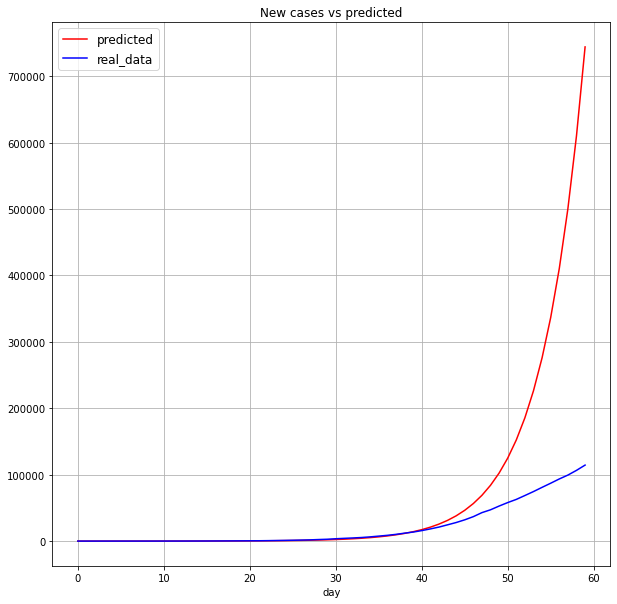

In [261]:
fig, ax = plt.subplots(figsize=(10,10))

day = 60
ax.plot(df[df['day_num']< day].index, np.exp(df[df['day_num']< day]['pred_cases'].values), color = 'red', label = 'predicted')
ax.plot(df[df['day_num']< day].index, df[df['day_num'] < day]['total_cases'].values, color = 'blue', label = 'real_data')


ax.set(xlabel='day', title='New cases vs predicted')
ax.grid()
plt.legend(fontsize='large')
plt.show()

Видно, что даже при 60 днях предсказания улетаеют по экспоненте и сильно расходятся с реальными цифрами

    b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса)

In [262]:
alpha, beta = reg.coef_[0], reg.intercept_

In [263]:
reg.coef_

array([0.19829091])

In [264]:
N = 250
xs = np.linspace(0, 60, N)
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.figure(figsize=(8, 8))
    plt.axis('equal')
    plt.xlim((-1, 1))
    plt.ylim((-1, 2))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.show()

(250, 250)


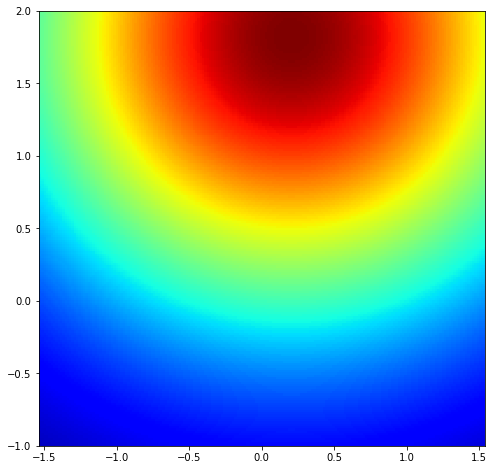

In [265]:
cur_mu, cur_sigma = np.array([alpha, beta]), 2*np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

myplot_heatmap(Z)

    c.Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [266]:
start = pd.to_datetime('2020-03-03')
may = pd.to_datetime('2020-05-01')
june = pd.to_datetime('2020-06-01')
sept = pd.to_datetime('2020-09-01')

x_may = np.array([[(may - start).days]])
x_june = np.array([[(june - start).days]])
x_sept = np.array([[(sept - start).days]])

In [267]:
y_may_total = int(np.exp(reg.predict(x_may)))
y_june_total = int(np.exp(reg.predict(x_june)))
y_sept_total = int(np.exp(reg.predict(x_sept)))

In [268]:
print(f'К 1 мая {y_may_total} случаев')
print(f'К 1 июня {y_june_total} случаев')
print(f'К 1 сентября {y_sept_total} случаев')

К 1 мая 744077 случаев
К 1 июня 347723874 случаев
К 1 сентября 29104907396229896 случаев


In [274]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    plt.figure(figsize=(8, 8))    
    my_w = np.random.multivariate_normal(mu, sigma, n)

    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((0, 10**5))
    plt.xlim((0, 60))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

In [275]:
def bayesian_update(mu, sigma, x, y, sn):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

sn = np.std(df['pred_cases'] - df['total_cases_log'])

post_mu, post_sigma = cur_mu, cur_sigma
for i in range(train.shape[0]):
    px, py = train['day_num'][i], train['total_cases_log'][i]
    post_mu, post_sigma = bayesian_update(post_mu, post_sigma, px, py, sn)

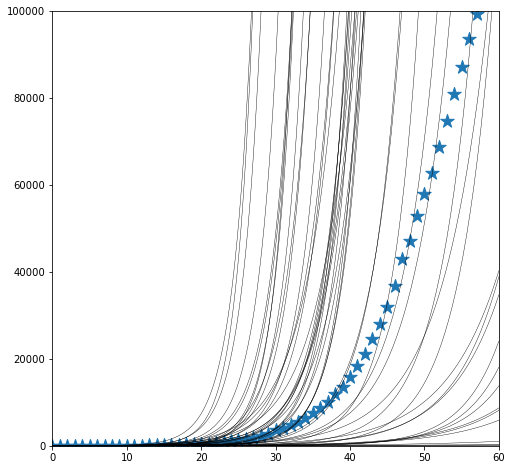

In [276]:
myplot_sample_lines(post_mu, post_sigma, 50, points=[df['day_num'], df['total_cases']])


    3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

    Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.


    a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Для того, чтобы обучиться под плотность нормального распределения (экспоненту квадратичной функции) линейной регрессией, обучим полином 2 степени от логарифма таргета.
$$ y \sim \exp (\alpha_1 \cdot x^2 + \alpha_2 \cdot x + \beta) \Leftrightarrow \ln y \sim \alpha_1 \cdot x^2 + \alpha_2 \cdot x + \beta$$

    b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [277]:
df['day_sqr'] = df['day_num']**2
df['new_cases_log'] = np.log(df['new_cases'].replace(0, 1))

In [278]:
train = df[:50]
test = df[50:]

In [279]:
lr2 = LinearRegression()
lr2.fit(train[['day_num', 'day_sqr']].values, train['new_cases_log'].values)

LinearRegression()

In [281]:
df['pred_cases_2'] = lr2.predict(df[['nday', 'day_sqr']].values)

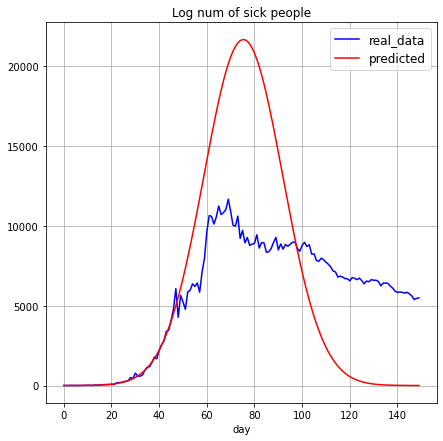

In [284]:
fig, ax = plt.subplots(figsize=(7,7))

day = 150
ax.plot(df[df['day_num']< day]['day_num'].values, df[df['day_num']< day]['new_cases'].values, color='blue',  label='real_data')
ax.plot(df[df['day_num']< day]['day_num'].values, np.exp(df[df['day_num']< day]['pred_cases_2'].values), color='red', label='predicted')
ax.set(xlabel='day', title='Log num of sick people')
ax.grid()
plt.legend(fontsize='large')
plt.show()

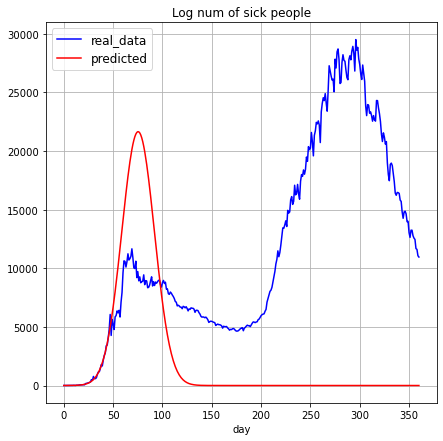

In [286]:
fig, ax = plt.subplots(figsize=(7,7))

day = 400
ax.plot(df[df['day_num']< day]['day_num'].values, df[df['day_num']< day]['new_cases'].values, color='blue',  label='real_data')
ax.plot(df[df['day_num']< day]['day_num'].values, np.exp(df[df['day_num']< day]['pred_cases_2'].values), color='red', label='predicted')
ax.set(xlabel='day', title='Log num of sick people')
ax.grid()
plt.legend(fontsize='large')
plt.show()

Видно, что сигмоида еще как-то справилась с первой волной вируса, но вторую волну она уже предсказать не смогла